In [23]:
import yfinance as yf
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score

plt.figure(figsize=(12, 9))
from alpha_vantage.timeseries import TimeSeries
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
#from pandas_datareader import data as pdr



<Figure size 1200x900 with 0 Axes>

In [62]:

api_key = 'YOUR_API_KEY'
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily historical data for AAPL
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
print(data.head())
meta_data

            1. open  2. high   3. low  4. close   5. volume
date                                                       
2025-01-17  232.115   232.29  228.480    229.98  68488301.0
2025-01-16  237.350   238.01  228.030    228.26  71759052.0
2025-01-15  234.635   238.96  234.430    237.87  39831969.0
2025-01-14  234.750   236.12  232.472    233.28  39435294.0
2025-01-13  233.530   234.67  229.720    234.40  49630725.0


{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2025-01-17',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [60]:
# Fetch data for Apple (AAPL) from Jan 1, 2020, to Jan 17, 2025
data = yf.download('AAPL', start='2020-01-01', end='2022-01-01',actions=True)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close Dividends       High        Low       Open Stock Splits  \
Ticker           AAPL      AAPL       AAPL       AAPL       AAPL         AAPL   
Date                                                                            
2020-01-02  72.796028       0.0  72.856621  71.545395  71.799881          0.0   
2020-01-03  72.088295       0.0  72.851761  71.862892  72.020432          0.0   
2020-01-06  72.662704       0.0  72.701485  70.953995  71.206062          0.0   
2020-01-07  72.320992       0.0  72.929337  72.100433  72.672425          0.0   
2020-01-08  73.484360       0.0  73.787323  72.022865  72.022865          0.0   

Price          Volume  
Ticker           AAPL  
Date                   
2020-01-02  135480400  
2020-01-03  146322800  
2020-01-06  118387200  
2020-01-07  108872000  
2020-01-08  132079200  


In [63]:
print(data.columns)

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [65]:


# For time stamps
from datetime import datetime


# Set up End and Start times for data grab
tech_list = ['AAPL', 'NVDA', 'AVGO', 'AMZN']

end = '2020-01-01'
start = '2015-01-01'
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, NVDA, AVGO, AMZN]
company_name = ["APPLE", "NVIDIA", "Broadcom Inc", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed



*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,NVDA,NVDA,NVDA,NVDA,...,AVGO,AVGO,AVGO,AVGO,AVGO,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-17,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.532997,89.599998,88.869499,88.900497,72888000.0
2019-12-18,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.201500,89.910004,89.117996,89.750999,67028000.0
2019-12-19,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.613998,89.649498,88.703003,89.025002,53056000.0
2019-12-20,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.324997,90.148499,89.122498,89.981003,103016000.0
2019-12-23,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.650002,89.650002,89.225502,89.413002,42728000.0
2019-12-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.460503,89.778503,89.378998,89.690498,17626000.0
2019-12-26,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.438499,93.523003,89.974998,90.050499,120108000.0
2019-12-27,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.489998,95.070000,93.300499,94.146004,123732000.0


In [13]:
AAPL.describe()
#We have only 255 records in one year because weekends are not included in the data.Describe exclude the NAN values 

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,209.310709,211.108364,207.322317,209.161962,5.669196e+07
std,26.035672,26.130237,25.657956,25.920148,3.094154e+07
min,164.405121,165.800067,163.488440,164.753864,2.323470e+07
25%,184.515636,186.222354,182.867252,185.041598,4.120708e+07
50%,218.177139,220.689535,216.052363,218.546304,4.966605e+07
75%,228.274998,229.927648,226.339797,228.437504,6.232015e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [5]:
AAPL.info()
#There are 250 entries as approx 250 trading days

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 485 entries, 2020-01-31 to 2021-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     485 non-null    float64
 1   (High, AAPL)      485 non-null    float64
 2   (Low, AAPL)       485 non-null    float64
 3   (Open, AAPL)      485 non-null    float64
 4   (Volume, AAPL)    485 non-null    int64  
 5   (company_name, )  485 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 26.5+ KB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

*********************100%***********************]  1 of 1 completed

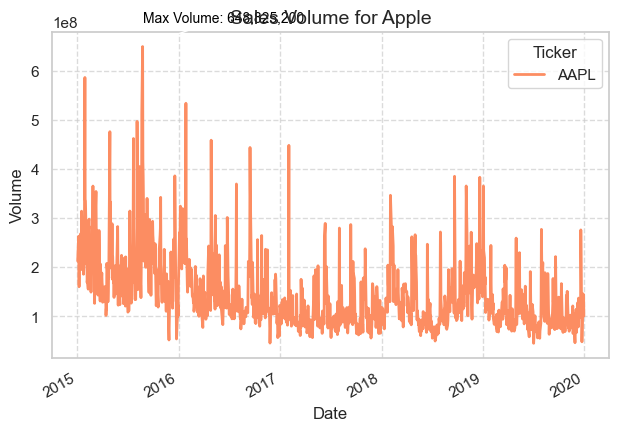

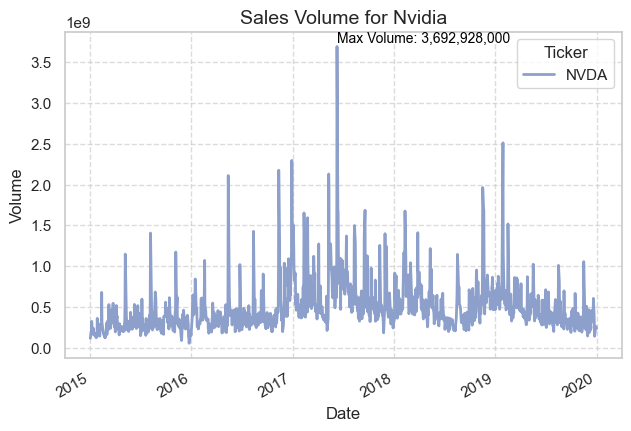

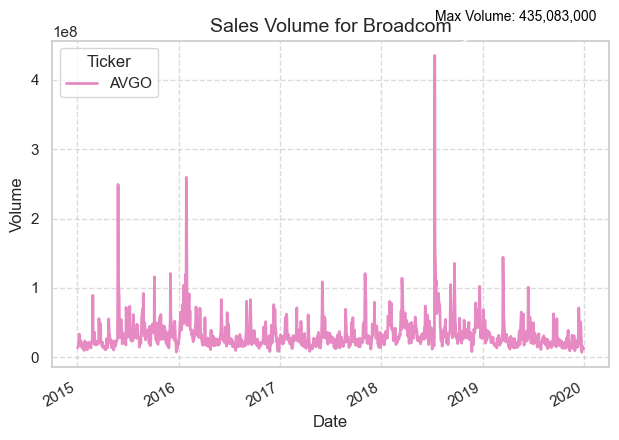

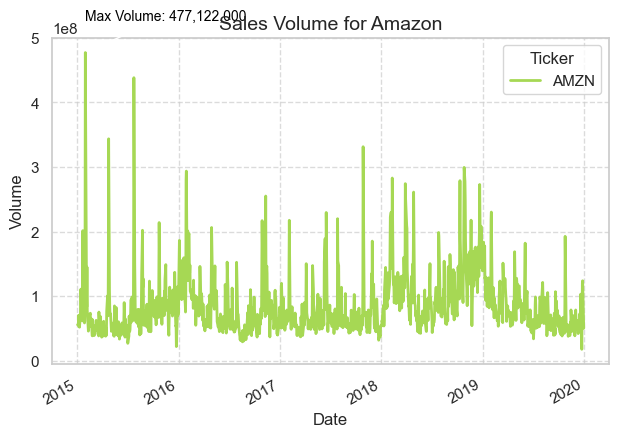

In [66]:

# Set Seaborn style for better visual appearance
sns.set(style="whitegrid")

# List of companies (tickers) and their corresponding names
company_tickers = ['AAPL', 'NVDA', 'AVGO', 'AMZN']
company_names = ['Apple', 'Nvidia', 'Broadcom', 'Amazon']

# Fetch stock data for each company from Yahoo Finance
def fetch_stock_data(tickers, start_date, end_date):
    """Fetch historical stock data for each ticker."""
    return [yf.download(ticker, start=start, end=end) for ticker in tickers]

# Plotting the daily trading volume for each stock company
def plot_stock_volume(company_data, company_names):
    """Plot the daily volume of stocks for the given companies."""
    #plt.figure(figsize=(15, 12))  # Set the figure size for the plots
    #plt.subplots_adjust(top=1.1, bottom=0.05, left=0.1, right=1.3)  # Adjust spacing for better layout

    # Loop through each company's data and plot their volume
    for i, (company, company_name) in enumerate(zip(company_data, company_names), 1):
        #plt.subplot(2, 2, i)  # 2x2 grid for 4 companies (adjust as needed)
        
        # Plot the volume of stock traded each day with a specific color
        company['Volume'].plot(color=sns.color_palette("Set2")[i], linewidth=2)
        
        # Enable gridlines for better readability
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Set labels and title for each subplot
        plt.ylabel('Volume')
        plt.xlabel('Date')
        plt.title(f"Sales Volume for {company_name}", fontsize=14)
        
        # Annotate the maximum volume point
        max_volume_date = company['Volume'].idxmax()
        max_volume_value = company['Volume'].max()
        
        # Convert max volume value to scalar (int or float)
        max_volume_value = max_volume_value.item()  # Ensures scalar value
        
        # Annotate with the max volume and draw an arrow pointing to it
        plt.annotate(f'Max Volume: {max_volume_value:,.0f}', 
                     xy=(max_volume_date, max_volume_value),  # Point to max volume
                     xytext=(max_volume_date, max_volume_value + 50000010),  # Position of the annotation
                     arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
                     fontsize=10, color='black')


    # Adjust layout to avoid overlapping subplots
    #plt.tight_layout()
    
    # Display the plots
    plt.show()

# Main Execution
if __name__ == "__main__":
    
    # Fetch stock data for each company
    company_data = fetch_stock_data(company_tickers, start, end)
    
    # Plot stock volume data with annotations
    plot_stock_volume(company_data, company_names)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

*********************100%***********************]  1 of 1 completed

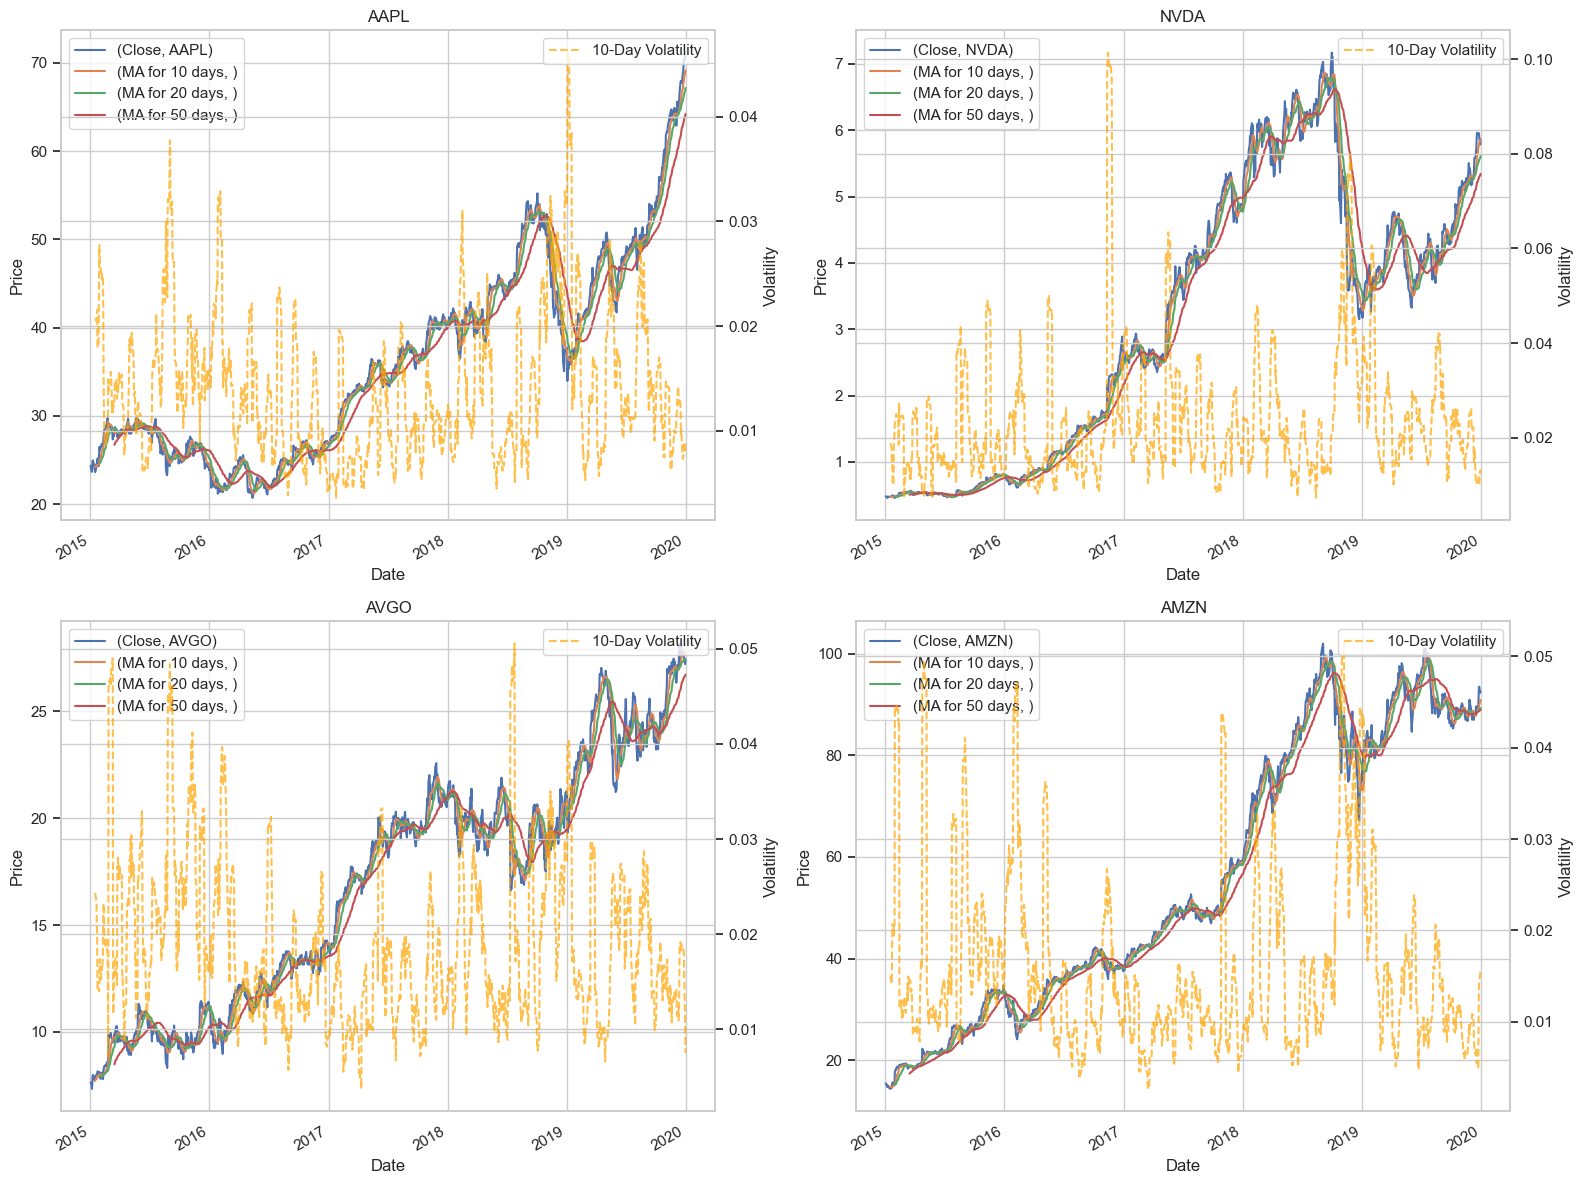

In [67]:
#Moving average 

# Step 1: Fetch data for multiple companies
company_list = ['AAPL', 'NVDA', 'AVGO', 'AMZN']  # Add tickers here


companies = {}
for company in company_list:
    companies[company] = yf.download(company, start=start, end=end)

# Step 2: Calculate Moving Averages and Volatility
ma_day = [10, 20, 50]

for company_name, company_data in companies.items():
    # Moving Averages
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company_data[column_name] = company_data['Close'].rolling(ma).mean()
    
    # Volatility (Rolling Standard Deviation of Daily Returns)
    company_data['Daily_Return'] = company_data['Close'].pct_change()
    company_data['Volatility (10-day)'] = company_data['Daily_Return'].rolling(10).std()

# Step 3: Plot Moving Averages and Volatility
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

# Plot for each company
for idx, (company_name, company_data) in enumerate(companies.items()):
    row, col = divmod(idx, 2)
    ax = axes[row, col]
    
    # Plot Moving Averages
    company_data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    
    # Plot Volatility
    ax2 = ax.twinx()
    company_data['Volatility (10-day)'].plot(ax=ax2, color='orange', linestyle='--', alpha=0.7)
    
    # Titles and Legends
    ax.set_title(company_name)
    ax.set_ylabel('Price')
    ax2.set_ylabel('Volatility')
    ax.legend(loc='upper left')
    ax2.legend(['10-Day Volatility'], loc='upper right')

fig.tight_layout()
plt.show()


Key Updates:
Volatility Calculation:
Calculated as the rolling standard deviation of daily returns (Daily_Return) over a 10-day window.


Visualization Enhancements:
Added a secondary y-axis to each subplot to visualize volatility alongside moving averages and closing prices.
Used distinct styles (e.g., dashed orange line) for volatility to differentiate it from price data.
Subplot Structure:
Maintained a 2x2 grid layout, with one subplot for each company.

In [68]:
# Define the list of tech stocks
tech_list = ["AAPL", "NVDA", "AVGO", "AMZN"]

# Fetch data for all stocks
data_close = yf.download(tech_list, start=start, end=end)["Close"]

# Calculate percentage changes (returns)
tech_rets = data_close .pct_change()

print(data_close .head())

[*********************100%***********************]  4 of 4 completed

Ticker           AAPL     AMZN      AVGO      NVDA
Date                                              
2015-01-02  24.347174  15.4260  7.628656  0.483144
2015-01-05  23.661268  15.1095  7.506706  0.474983
2015-01-06  23.663502  14.7645  7.335981  0.460582
2015-01-07  23.995310  14.9210  7.534145  0.459382
2015-01-08  24.917273  15.0230  7.910662  0.476663


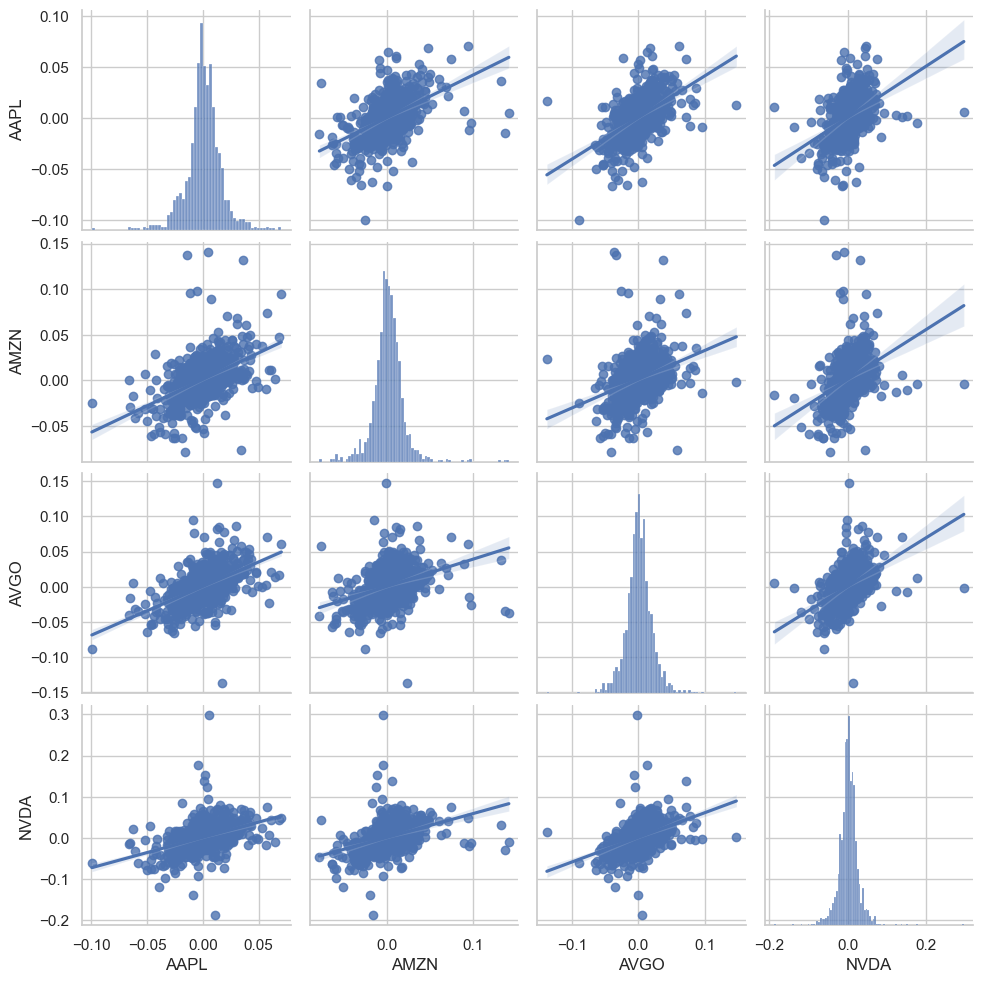

In [69]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

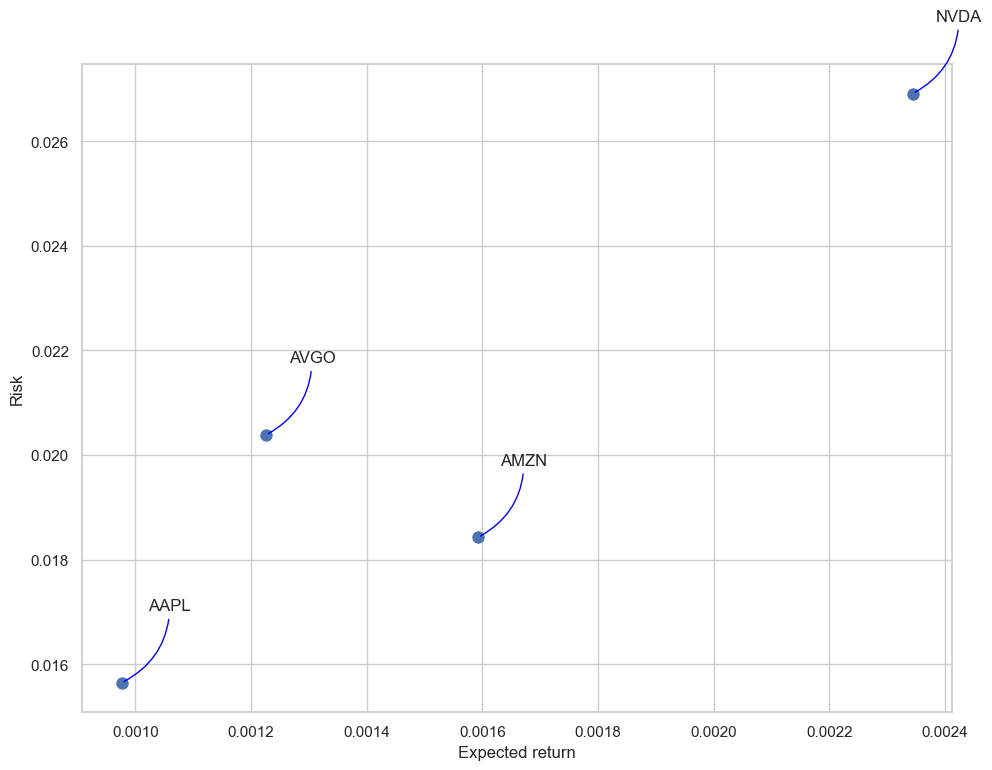

In [70]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [71]:
# Define the stock ticker, start date, and end date
ticker = 'AAPL'

# Fetch the stock data
df = yf.download(ticker, start=start, end=end)


*********************100%***********************]  1 of 1 completed

In [113]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400
2020-01-03,72.088272,72.851738,71.862869,72.020409,146322800
2020-01-06,72.662727,72.701508,70.954017,71.206085,118387200
2020-01-07,72.320969,72.929314,72.100410,72.672402,108872000
2020-01-08,73.484367,73.787331,72.022872,72.022872,132079200
...,...,...,...,...,...
2021-12-27,177.423660,177.512206,174.216206,174.235873,74919600
2021-12-28,176.400436,178.407567,175.652690,177.256425,79144300


In [72]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1196

In [73]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
dataset = pd.DataFrame(df)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07231135, 0.07592564, 0.06861426, 0.08383249, 0.27738933],
       [0.0587223 , 0.06356042, 0.05991677, 0.07000861, 0.35084852],
       [0.05876655, 0.05815359, 0.05641998, 0.062205  , 0.36086945],
       ...,
       [0.98151271, 1.        , 0.9931687 , 1.        , 0.16708951],
       [0.98977228, 0.99382636, 0.9790192 , 0.991944  , 0.16352358],
       [1.        , 0.99860144, 1.        , 0.99422489, 0.09174626]],
      shape=(1258, 5))

In [74]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape



[array([0.07231135, 0.0587223 , 0.05876655, 0.06534028, 0.08360605,
       0.08413535, 0.07195841, 0.07623798, 0.07438516, 0.06123729,
       0.05757528, 0.06961985, 0.07328205, 0.08585607, 0.08841489,
       0.08894445, 0.07147317, 0.09869487, 0.11453401, 0.10685706,
       0.1133427 , 0.11343098, 0.11744573, 0.12121097, 0.11673728,
       0.12023634, 0.13042397, 0.14309209, 0.15009048, 0.15283688,
       0.1561589 , 0.16010115, 0.158905  , 0.163556  , 0.17905893,
       0.17538253, 0.16041097, 0.16763091, 0.15894925, 0.16173983,
       0.16293586, 0.15930378, 0.14986912, 0.15071069, 0.15310249,
       0.14145322, 0.13139841, 0.14118738, 0.13737834, 0.14340214,
       0.15265961, 0.15899361, 0.15469715, 0.14761018, 0.15341258,
       0.15110928, 0.13644811, 0.1402573 , 0.13587222, 0.14969193])]
[np.float64(0.1410988796552034)]

[array([0.07231135, 0.0587223 , 0.05876655, 0.06534028, 0.08360605,
       0.08413535, 0.07195841, 0.07623798, 0.07438516, 0.06123729,
       0.05757528, 0.069

In [75]:
# Feature creation (e.g., calculate moving averages)
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['Daily_Return'] = df['Close'].pct_change()

# Drop NaN values caused by rolling windows
df.dropna(inplace=True)

In [76]:
# Features: Include technical indicators and other relevant columns
X = df[['SMA_10', 'SMA_50', 'Daily_Return']]

# Define target (shift -1 for next day prediction)
y = df['Close'].shift(-1)

# Drop the last row of `data` to match the shifted target
df = df.iloc[:-1]
y = y.iloc[:-1]


In [77]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Price          SMA_10     SMA_50 Daily_Return
Ticker                                       
Date                                         
2015-03-16  28.120816  26.707245     0.011004
2015-03-17  28.068947  26.788356     0.016727
2015-03-18  28.067382  26.889580     0.011256
2015-03-19  28.091751  26.986422    -0.007550
2015-03-20  28.076101  27.069473    -0.012549
...               ...        ...          ...
2019-12-24  67.503126  63.111597     0.000951
2019-12-26  67.967023  63.379631     0.019840
2019-12-27  68.411531  63.651724    -0.000379
2019-12-30  68.808292  63.927756     0.005935
2019-12-31  69.142522  64.208653     0.007306

[1209 rows x 3 columns]
Shape of X: (1209, 3)
Shape of y: (1208, 1)


In [78]:

# Drop NaN values from both `X` and `y` after shifting
X = X.iloc[:-1]
y = y.iloc[:-1]
# Drop NaN values
combined = pd.concat([X, y], axis=1).dropna()

# Split back into X and y
X = combined.iloc[:, :1]  # All columns except the last
y = combined.iloc[:, -1]   # Last column

In [79]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1207, 1)
Shape of y: (1207,)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

Train set size: (965, 1), Test set size: (242, 1)


RandomForestRegressor(n_estimators=200, random_state=42)

Mean Squared Error: 1.4833345704561633
Mean Absolute Error: 0.8802744221490277


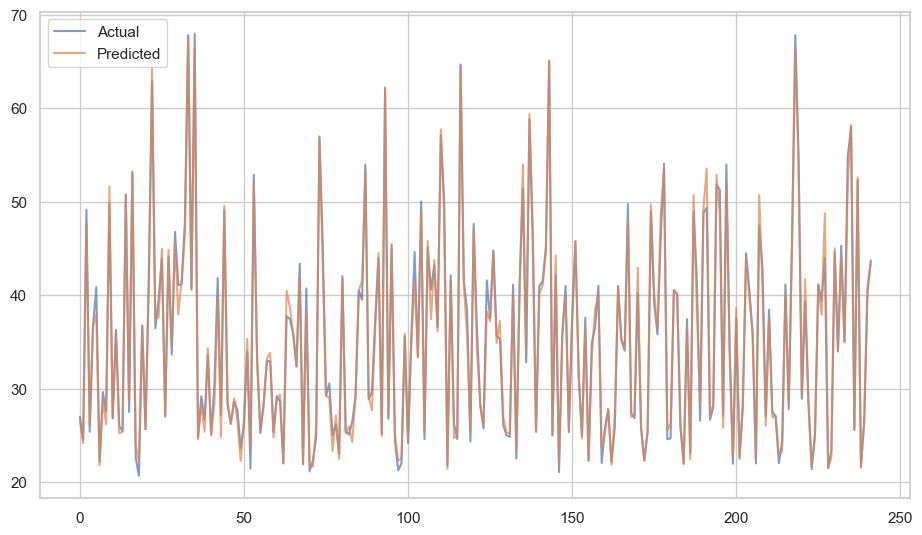

In [81]:
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualize predictions vs. actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.show()

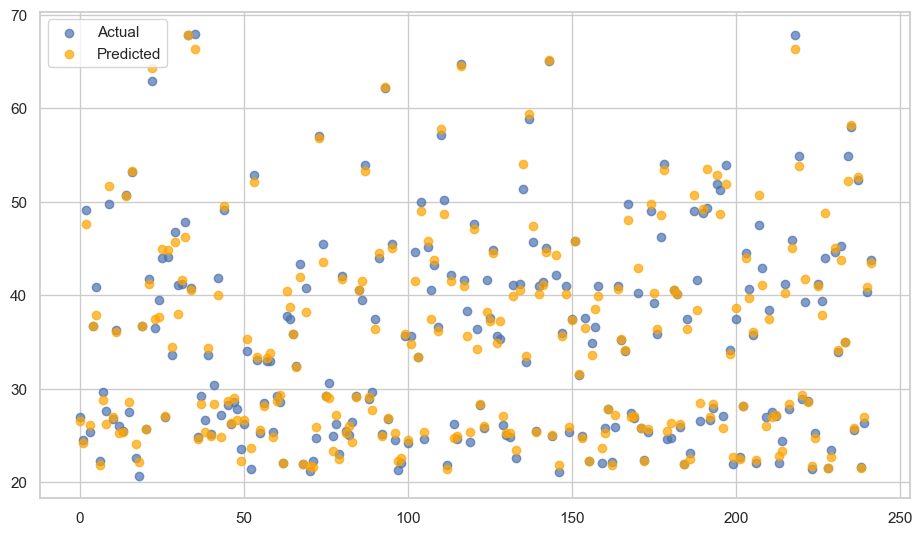

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7, color='orange')
plt.legend()
plt.show()


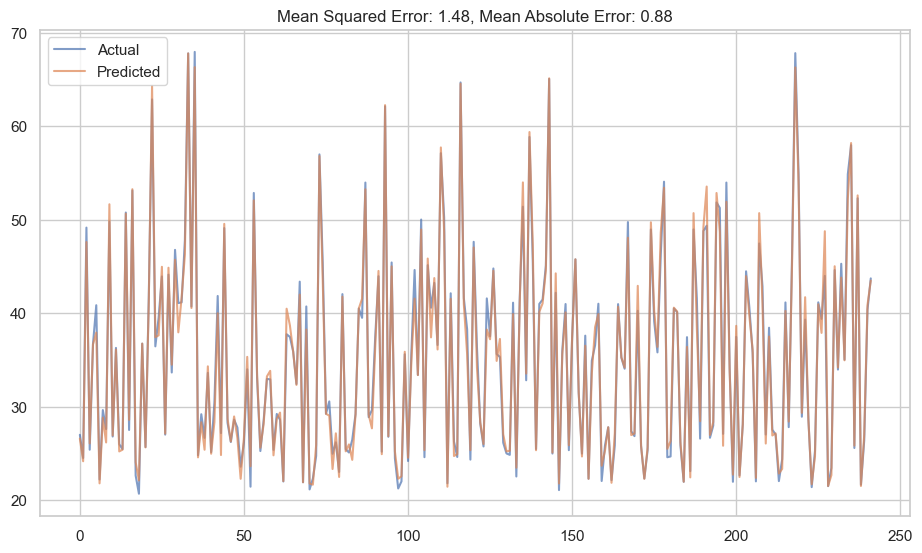

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title(f"Mean Squared Error: {mse:.2f}, Mean Absolute Error: {mae:.2f}")
plt.show()


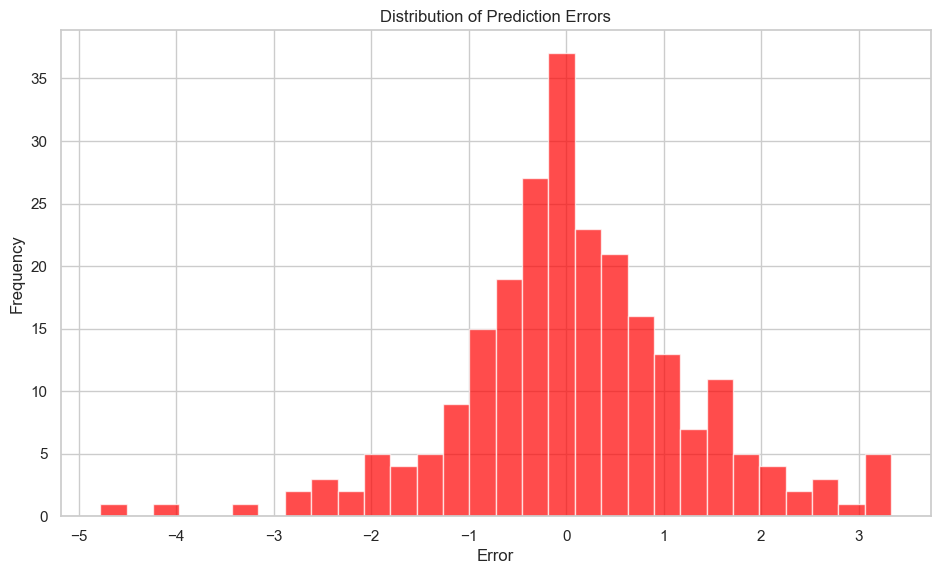

In [84]:
errors = y_test.values - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='red')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [85]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 1.48
Mean Absolute Error: 0.88


In [86]:

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 200}


In [87]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [89]:
y_pred_best = model.predict(X_test)

Mean Squared Error: 1.4833345704561633
Mean Absolute Error: 0.8802744221490277


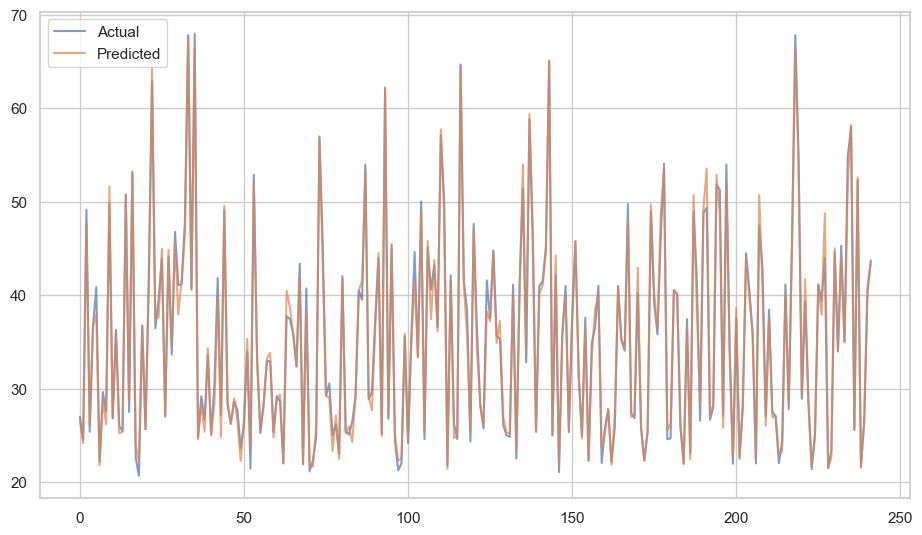

In [90]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualize predictions vs. actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796013  72.856606  71.545380  71.799866  135480400
2020-01-03  72.088295  72.851761  71.862892  72.020432  146322800
2020-01-06  72.662712  72.701492  70.954002  71.206070  118387200
2020-01-07  72.320961  72.929306  72.100403  72.672394  108872000
2020-01-08  73.484375  73.787338  72.022880  72.022880  132079200
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
2020-01-03  5.877111  5.920928  5.828067  5.852963  205384000
2020-01-06  5.901758  5.906986  5.757613  5.783753  262636000
2020-01-07  5.973209  6.019017  5.885079  5.930140  314856000
2020-01-08  5.984413  6.025740  5.9288



*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           AVGO       AVGO       AVGO       AVGO      AVGO
Date                                                            
2020-01-02  27.986179  27.995730  27.546062  27.719678  20329000
2020-01-03  27.274353  27.778710  27.264804  27.562556  22870000
2020-01-06  27.233547  27.250909  26.878500  26.984406  20789000
2020-01-07  27.139799  27.481825  27.105944  27.366369  18565000
2020-01-08  26.801247  27.213587  26.772599  27.169314  31979000
Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809


*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2020-01-02  94.900497  94.900497  93.207497  93.750000  80580000
2020-01-03  93.748497  94.309998  93.224998  93.224998  75288000
2020-01-06  95.143997  95.184502  93.000000  93.000000  81236000
2020-01-07  95.343002  95.694504  94.601997  95.224998  80898000
2020-01-08  94.598503  95.550003  94.321999  94.902000  70160000
Correlation Matrix:
          AAPL      NVDA      AVGO      TSLA      AMZN
AAPL  1.000000  0.713038  0.698023  0.519400  0.663193
NVDA  0.713038  1.000000  0.741275  0.548814  0.663039
AVGO  0.698023  0.741275  1.000000  0.515285  0.566227
TSLA  0.519400  0.548814  0.515285  1.000000  0.477203
AMZN  0.663193  0.663039  0.566227  0.477203  1.000000


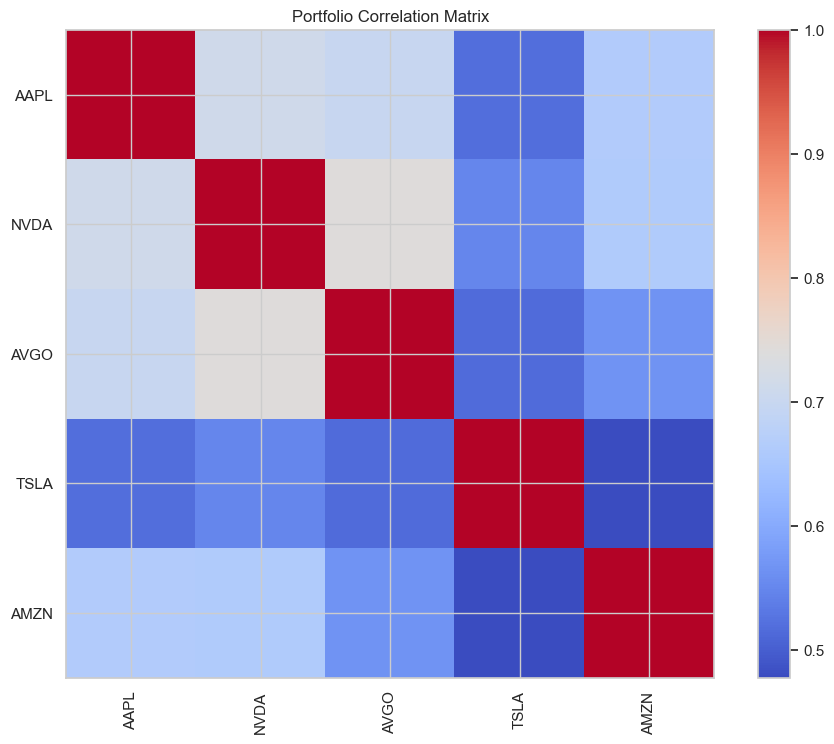


/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796013  72.856606  71.545380  71.799866  135480400
2020-01-03  72.088295  72.851761  71.862892  72.020432  146322800
2020-01-06  72.662712  72.701492  70.954002  71.206070  118387200
2020-01-07  72.320961  72.929306  72.100403  72.672394  108872000
2020-01-08  73.484375  73.787338  72.022880  72.022880  132079200


[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 11.29193763803178
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
2020-01-03  5.877111  5.920928  5.828067  5.852963  205384000
2020-01-06  5.901758  5.906986  5.757613  5.783753  262636000
2020-01-07  5.973209  6.019017  5.885079  5.930140  314856000
2020-01-08  5.984413  6.025740  5.928896  5.968978  277108000



/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 0.4446133634200812
Price           Close       High        Low       Open    Volume
Ticker           AVGO       AVGO       AVGO       AVGO      AVGO
Date                                                            
2020-01-02  27.986179  27.995730  27.546062  27.719678  20329000
2020-01-03  27.274353  27.778710  27.264804  27.562556  22870000
2020-01-06  27.233547  27.250909  26.878500  26.984406  20789000
2020-01-07  27.139799  27.481825  27.105944  27.366369  18565000
2020-01-08  26.801247  27.213587  26.772599  27.169314  31979000



/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 0.7983567095065308
Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500



/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 127.4523400373879
Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2020-01-02  94.900497  94.900497  93.207497  93.750000  80580000
2020-01-03  93.748497  94.309998  93.224998  93.224998  75288000
2020-01-06  95.143997  95.184502  93.000000  93.000000  81236000
2020-01-07  95.343002  95.694504  94.601997  95.224998  80898000
2020-01-08  94.598503  95.550003  94.321999  94.902000  70160000



/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 22.35252575994404


In [91]:
#Display the corelation of Stock 

# Step 1: Fetch historical stock data
def fetch_stock_data(ticker, start, end):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start, end=end)
    stock_data.index = pd.to_datetime(stock_data.index)  # Convert index to datetime
    print(stock_data.head())  # Print to check if data is fetched properly
    return stock_data

# Step 2: Add technical indicators
def add_features(data):
    data['SMA_10'] = data['Close'].rolling(window=10).mean()  # Simple Moving Average (10 days)
    data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Simple Moving Average (50 days)
    data['Daily_Return'] = data['Close'].pct_change()         # Daily Returns
    data = data.dropna()  # Drop rows with NaN values
    return data

# Step 3: Train a model to predict stock prices
def train_prediction_model(data):
    # Features: [SMA_10, SMA_50, Daily_Return]
    X = data[['SMA_10', 'SMA_50', 'Daily_Return']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Random Forest Regressor
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    
    return model, X_test, predictions

# Step 4: Portfolio diversification
def suggest_diversification(tickers, start, end):
    portfolio_data = pd.DataFrame()
    for ticker in tickers:
        stock = fetch_stock_data(ticker, start, end)
        stock['Daily_Return'] = stock['Close'].pct_change()
        portfolio_data[ticker] = stock['Daily_Return']
    
    # Calculate correlation matrix
    correlation_matrix = portfolio_data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    plt.title("Portfolio Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(tickers)), tickers, rotation=90)
    plt.yticks(range(len(tickers)), tickers)
    plt.show()



# Step 6: Visualize data with predicted minimum price
def visualize_predicted_min_prices(min_prices, current_prices, tickers):
    # Ensure the tickers, min_prices, and current_prices are lists and have matching lengths
    if len(min_prices) == len(current_prices) == len(tickers):
        # Create a DataFrame for visualization
        min_price_df = pd.DataFrame({
            'Stock': tickers,
            'Min Price': min_prices,
            'Current Price': current_prices
        })
        
        # Check the structure of the dataframe
        print(min_price_df.head())

        # Plot Min Price and Current Price side by side
        plt.figure(figsize=(12, 8))
        
        # Get the position indices for the bars
        x_pos = range(len(min_price_df))

        # Plot Min Price bar chart
        plt.bar(x_pos, min_price_df['Min Price'], color='blue', alpha=0.7, label='Predicted Min Price')
        
        # Plot Current Price bar chart (overlayed with transparency)
        plt.bar(x_pos, min_price_df['Current Price'], color='orange', alpha=0.5, label='Current Price')

        # Set the x-ticks to be the stock tickers
        plt.xticks(x_pos, min_price_df['Stock'], rotation=45)

        # Add labels and title
        plt.title("Current Prices vs Predicted Minimum Prices", fontsize=16)
        plt.xlabel('Stock')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    else:
        print("Error: The length of min_prices, current_prices, and tickers do not match.")


   
# Main Function
def main():
    # Define parameters
    start_date = '2020-01-01'
    end_date = '2022-12-31'
    tickers = ['AAPL', 'NVDA', 'AVGO', 'TSLA', 'AMZN']  # Portfolio for diversification

    suggest_diversification(tickers, start_date, end_date)
    
    # Initialize lists to store results
    min_prices = []  # Initialize as list
    current_prices = []  # Initialize as list
    predictions = {}  # To store predictions for each stock

    # Fetch and process data for each ticker
    for ticker in tickers:
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        stock_data = add_features(stock_data)
        
        # Train model and generate predictions for each stock
        model, X_test, predicted_prices = train_prediction_model(stock_data)
        predictions[ticker] = predicted_prices
        
        # Estimate minimum price (just an example)
        min_price = stock_data['Close'].min()  # Minimum price in the range
        min_prices.append(min_price)  # Append to the list
        current_prices.append(stock_data['Close'].iloc[-1])  # Append current price

   

# Run the main function
if __name__ == "__main__":
    main()


/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 1.1357223858898398
R2 Score: 0.9996532455062405


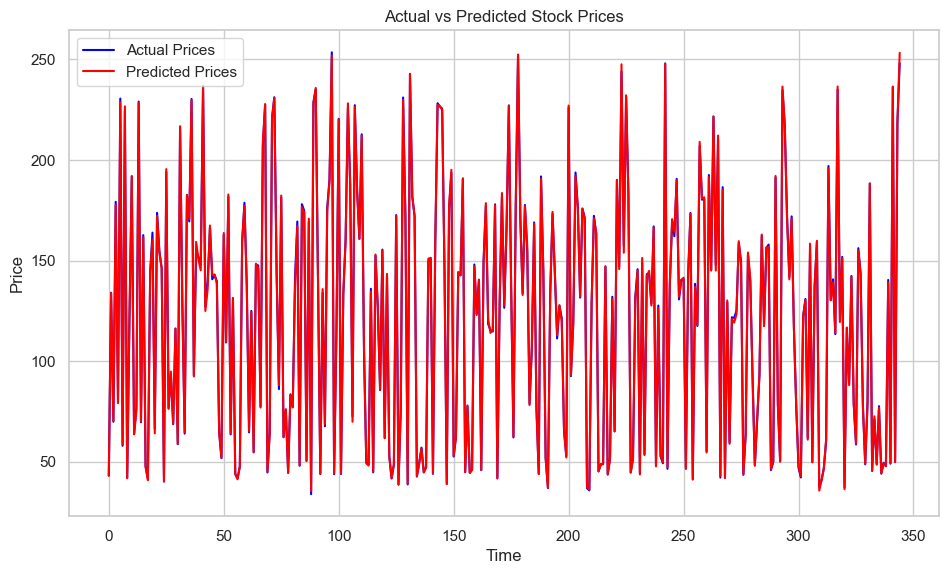

In [92]:


# Step 1: Fetch Historical Data
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Date'] = data.index
    data.reset_index(drop=True, inplace=True)
    data['Daily_Return'] = data['Close'].pct_change()
    return data

# Step 2: Preprocess Data
def preprocess_data(data):
    # Add technical indicators (moving averages)
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['Volatility'] = data['Close'].rolling(window=10).std()
    
    # Drop rows with NaN values
    data = data.dropna()
    return data

# Step 3: Prepare Features and Labels
def prepare_features(data):
    features = data[['Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'Volatility']]
    labels = data['Close']
    return features, labels

# Step 4: Train-Test Split
def split_data(features, labels, test_size=0.2):
    return train_test_split(features, labels, test_size=test_size, random_state=42)

# Step 5: Train Model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 6: Evaluate Model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return predictions, rmse, r2

# Step 7: Visualize Results
def visualize_results(y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label="Actual Prices", color='blue')
    plt.plot(predictions, label="Predicted Prices", color='red')
    plt.title("Actual vs Predicted Stock Prices")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Main Function
if __name__ == "__main__":
    # Fetch data
    ticker = "AAPL"  # Example: Apple stock
    start_date = "2018-01-01"
    end_date = "2025-01-17"
    
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    stock_data = preprocess_data(stock_data)
    
    # Prepare features and labels
    features, labels = prepare_features(stock_data)
    X_train, X_test, y_train, y_test = split_data(features, labels)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Evaluate the model
    predictions, rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    
    # Visualize results
    visualize_results(y_test, predictions)



In [199]:
#Find the best parameters 

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for best Random Forest model
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Train the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionW

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [93]:
#Compare the two models 

# Step 1: Fetch historical stock data (using Yahoo Finance API)
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2015-01-01', end='2020-01-01',actions=True)

# Create additional features (e.g., moving averages, returns)
data['Return'] = data['Close'].pct_change()  # Daily returns
data['MA_20'] = data['Close'].rolling(20).mean()  # 20-day moving average
data['MA_50'] = data['Close'].rolling(50).mean()  # 50-day moving average
data = data.dropna()  # Drop NaN values after rolling calculations

# Feature selection: Using "Open", "High", "Low", "Volume", and moving averages as features
features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50']
X = data[features]
y = data['Close']  # Predicting the 'Close' price

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 5: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20 , min_samples_split=2 ,random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions with both models
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 7: Evaluate model performance
# Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 8: Print the evaluation metrics for comparison
print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")

print("\nRandom Forest Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


if r2_lr > r2_rf:
    print("\nLinear Regression performs better than Random Forest.")
else:
    print("\nRandom Forest performs better than Linear Regression.")



/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression Model:
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.13
R-squared (R²): 1.00

Random Forest Model:
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
Mean Absolute Error (MAE): 0.18
R-squared (R²): 1.00

Linear Regression performs better than Random Forest.


Code Optimzer for linear Regression 


/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+01, tolerance: 6.858e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+01, tolerance: 5.505e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale

Best Alpha for Ridge Regression: {'alpha': 0.01}
Best Alpha for Lasso Regression: {'alpha': 0.01}
Ridge Regression - MAE: 0.6286, MSE: 0.7515, R²: 0.9896
Lasso Regression - MAE: 0.6514, MSE: 0.7635, R²: 0.9895


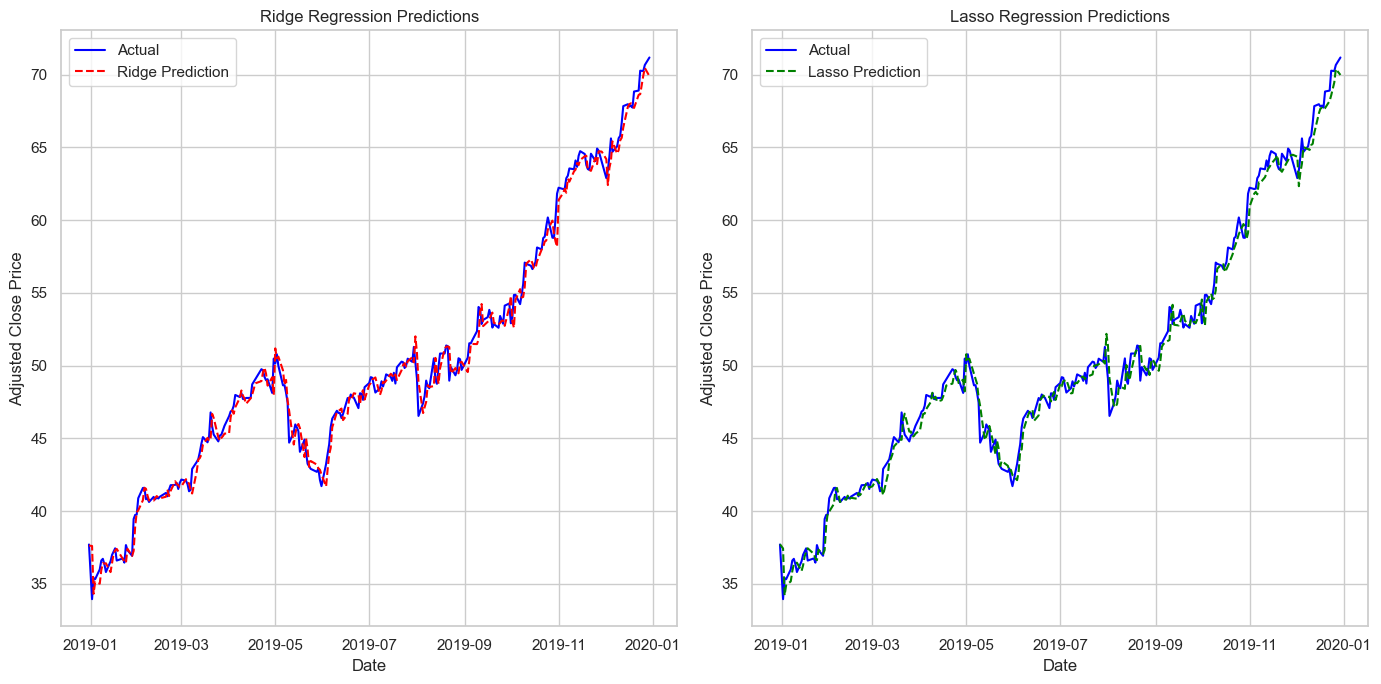

In [95]:


# Load the AAPL data (or your own data)
df = yf.download("AAPL", start="2015-01-01", end="2020-01-01")

# Create target variable (next day's price)
df['Target'] = df['Close'].shift(-1)  # Shift adjusted close price to predict next day's price

# Drop the last row because it has a NaN target value
df = df.dropna()

# Define the features (independent variables) and target (dependent variable)
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Target']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
ridge = Ridge()
lasso = Lasso()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search for Ridge Regression
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# Grid search for Lasso Regression
lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)

# Print the best alpha found for both models
print("Best Alpha for Ridge Regression:", ridge_grid.best_params_)
print("Best Alpha for Lasso Regression:", lasso_grid.best_params_)

# Train Ridge with the best alpha
ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Train Lasso with the best alpha
lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Train Ridge with the best alpha
ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Train Lasso with the best alpha
lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)
# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation results
print(f"Ridge Regression - MAE: {mae_ridge:.4f}, MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
print(f"Lasso Regression - MAE: {mae_lasso:.4f}, MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

plt.figure(figsize=(14, 7))

# Plot Ridge predictions
plt.subplot(1, 2, 1)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_ridge, label='Ridge Prediction', color='red', linestyle='--')
plt.title("Ridge Regression Predictions")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()

# Plot Lasso predictions
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_lasso, label='Lasso Prediction', color='green', linestyle='--')
plt.title("Lasso Regression Predictions")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()

plt.tight_layout()
plt.show()


Best Hyperparameters:
Ridge Regression: Best alpha = 0.01
Lasso Regression: Best alpha = 0.01
Model Performance Comparison:
Ridge Regression:
MAE (Mean Absolute Error): 2.4568
MSE (Mean Squared Error): 9.5786
R² (R-Squared): 0.9188
Lasso Regression:
MAE: 2.5166
MSE: 9.8059
R²: 0.9169
Interpretation:
Both models are performing very well with high R² values, meaning they explain most of the variance in the target variable.
Ridge Regression has slightly lower MAE, MSE, and a higher R² compared to Lasso Regression, indicating it might be the better model for your data in this case.
Conclusion:
Based on the evaluation metrics, Ridge Regression with an alpha of 0.01 is the better-performing model here.


*********************100%***********************]  1 of 1 completed

Best alpha for Ridge Regression: 1e-06
Ridge Regression - MAE: 3.6534
Ridge Regression - MSE: 23.7352
Ridge Regression - R²: 0.9815


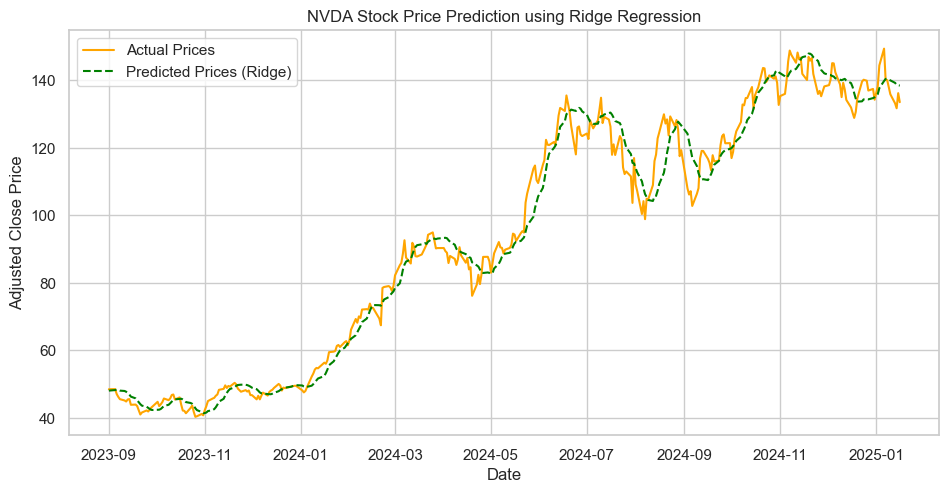

In [96]:


# Step 1: Fetch stock data (Example: AAPL)
ticker = 'NVDA'
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Data Preprocessing
# Use Adjusted Close prices for prediction
data = data[['Close']]
data['Date'] = data.index

# Feature Engineering (e.g., adding moving averages, lag features, etc.)
data['10-day MA'] = data['Close'].rolling(window=10).mean()
data['50-day MA'] = data['Close'].rolling(window=50).mean()

# Remove rows with missing values
data.dropna(inplace=True)

# Use features (Moving averages) to predict the target (Adjusted Close)
X = data[['10-day MA', '50-day MA']]
y = data['Close']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Hyperparameter Tuning using GridSearchCV for Ridge Regression
param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Range of alphas to search

ridge_regressor = Ridge()
grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha based on cross-validation
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha}")

# Step 5: Train the Ridge model using the best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = ridge_model.predict(X_test)

# Step 7: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression - MAE: {mae:.4f}")
print(f"Ridge Regression - MSE: {mse:.4f}")
print(f"Ridge Regression - R²: {r2:.4f}")

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices', color='orange')
plt.plot(y_test.index, y_pred, label='Predicted Prices (Ridge)', color='green', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction using Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


*********************100%***********************]  1 of 1 completed

Best alpha for Ridge Regression: 1e-06


/usr/local/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


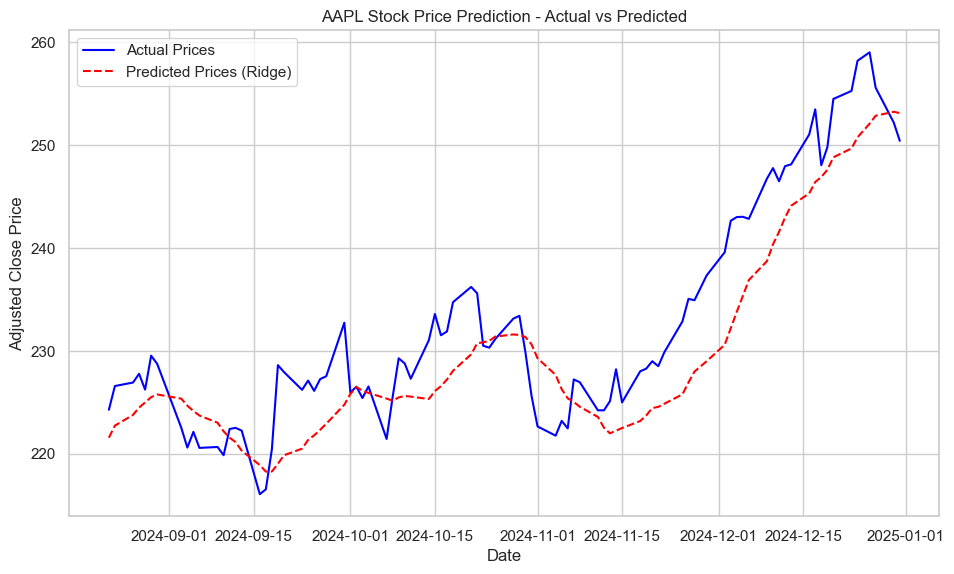

Predicted Minimum Stock Price in Test Period: 218.27


In [215]:


# Fetch stock data (example: AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2025-01-01")

# Data Preprocessing
data = data[['Close']]
data['Date'] = data.index

# Add Moving Averages and other features
data['10-day MA'] = data['Close'].rolling(window=10).mean()
data['50-day MA'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['10-day MA', '50-day MA']]
y = data['Close']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter Tuning for Ridge Regression
param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Range of alphas to search

ridge_regressor = Ridge()
grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha from GridSearchCV
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha}")

# Train the model with best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Predict future stock prices (next 30 days for example)
future_dates = pd.date_range(start=data.index[-1], periods=31, freq='B')[1:]  # Skip the first date (already in data)
future_data = pd.DataFrame(index=future_dates)

# Use the latest moving averages (based on last available data) to predict the future prices
latest_10_day_ma = data['10-day MA'].iloc[-1]
latest_50_day_ma = data['50-day MA'].iloc[-1]

# Create a DataFrame with these features for prediction
future_data['10-day MA'] = latest_10_day_ma
future_data['50-day MA'] = latest_50_day_ma

# Predict future stock prices
future_predictions = ridge_model.predict(future_data)

# Step 3: Calculate the minimum predicted stock price
min_predicted_price = future_predictions.min()

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# Plot the Actual vs Predicted Stock Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices (Ridge)', color='red', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction - Actual vs Predicted")
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Optional: Calculate the minimum predicted price in the test period
min_predicted_price = y_pred.min()
print(f"Predicted Minimum Stock Price in Test Period: {min_predicted_price:.2f}")

Data Preprocessing:
The Adj Close price is used as the target variable, and moving averages (10-day, 50-day) are added as features.
After preprocessing, we train the Ridge Regression model using the historical stock data.
Model Prediction:
The Ridge Regression model is used to predict future stock prices. Here, we predict the stock price for the next 30 days using the last known moving averages (10-day MA and 50-day MA).
You can extend the prediction period by adjusting the periods parameter.
Finding the Minimum Predicted Price:
Once the model predicts future prices, we find the minimum predicted price using .min().
Visualization:
A plot is shown to visualize the predicted stock prices over the next 30 days. The plot will help you understand the trend and visualize the lowest predicted price.
Key Takeaways:
The model predicts future stock prices based on historical features such as moving averages.
The minimum predicted price can be useful for risk management, as it shows the lowest point the stock may reach during the prediction period.
You can adjust the future_dates and features used for predictions to better suit your specific requirements.

Improvments :
This approach provides an estimate based on historical data but does not account for external factors (e.g., market news, company earnings) that can also affect stock prices. For more accurate predictions, you may consider using more advanced machine learning techniques or time series forecasting models like  LSTM, or XGBoost.


*********************100%***********************]  7 of 7 completed

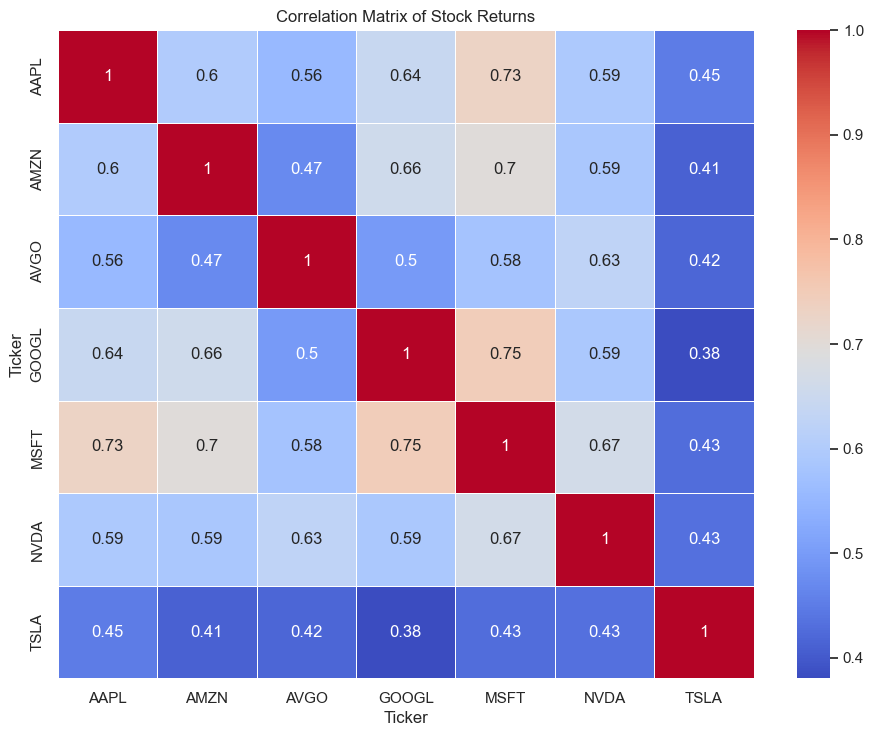

Correlation with AAPL:
Ticker
AAPL     1.000000
AMZN     0.598962
AVGO     0.555871
GOOGL    0.642280
MSFT     0.729025
NVDA     0.591669
TSLA     0.448315
Name: AAPL, dtype: float64


In [97]:


# List of stock tickers to analyze
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA','NVDA','AVGO']

# Download stock data for multiple companies
stocks_data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calculate daily returns for each stock
daily_returns = stocks_data.pct_change().dropna()

# Calculate the correlation matrix of the daily returns
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Returns')
plt.show()

# Optional: If you want to calculate the correlation with a specific stock (e.g., AAPL)
apple_correlation = correlation_matrix['AAPL']
print("Correlation with AAPL:")
print(apple_correlation)


AAPL and MSFT have a high positive correlation of 0.73.
AAPL and TSLA have a relatively lower positive correlation of 0.45, indicating they might behave differently.
Thus, you could suggest adding TSLA to a portfolio that already has AAPL and MSFT for better diversification.
